In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')


drive.mount('/content/drive')


In [ ]:
file_path = '/content/drive/MyDrive/YTML/YTML_Project_Data/V2_video_data.csv'
channel_file_path = '/content/drive/MyDrive/YTML/YTML_Project_Data/V2_channel_data.csv'

df_videos = pd.read_csv(file_path)
df_channels = pd.read_csv(channel_file_path)

In [ ]:
df_channels.tail()
df_videos.tail()

,video_id,title,published_at,channel_id,category_id,view_count,like_count,comment_count,duration,description,tags
6139,smkyorC5qwc,The Third Presidential Debate: Hillary Clinton...,2016-10-20T03:10:47Z,UCeY0bbntWzzVIaj2z3QigXg,25,17371011,75688,28506,PT1H55M59S,» Get Breaking News Alerts: http://nbcnews.to/...,"['nbc news', 'nbc', 'news', 'news channel', 'n..."
6140,1p-ggPszgfQ,"Ben Carson, Ted Cruz Respond to Iowa Voting Sc...",2016-02-07T02:37:03Z,UCBi2mrWuNuyYy4gbM6fU18Q,25,103928,789,175,PT5M8S,ABC News Republican Presidential Debate in New...,"['republican', 'debate', 'president', 'preside..."
6141,s67glms9mI4,The GOP Debate in Three Minutes,2015-09-17T16:45:56Z,UCUMZ7gohGI9HcU9VNsr2FJQ,25,161618,1178,69,PT2M39S,Sep 17 -- Eleven candidates took the stage Wed...,"['Bloomberg', 'Debate (Quotation Subject)', 'P..."
6142,7fmzBwnmQJM,Clinton vs. Trump: The second 2016 presidentia...,2020-09-26T15:42:36Z,UC6ZFN9Tx6xh-skXCuRHCDpQ,25,122273,762,0,PT1H33M50S,The 2016 presidential election cycle featured ...,"['Hillary Clinton', 'Donald Trump', 'Trump deb..."
6143,qlaum72JNRA,The Second Presidential Debate: Hillary Clinto...,2016-10-10T14:52:42Z,UCvJJ_dzjViJCoLf5uKUTwoA,25,3703734,21006,9628,PT1H32M15S,» Subscribe to CNBC: http://cnb.cx/SubscribeCN...,"['CNBC', 'business news', 'finance', 'stock', ..."


In [ ]:
#to handle class imbalance in the dataset, I am gonna merge all the categoryIDs to a singular category '99'=> (other)
threshold = 100

category_counts = df['category_id'].value_counts()
rare_categories = df['category_id'].value_counts()[df['category_id'].value_counts() < threshold].index

df['category_id'] = df['category_id'].replace(rare_categories, 99)


print(f"Categories with fewer than {threshold} videos have been merged into category '99'.")
print("\nNew Category Distribution:")
print(df['category_id'].value_counts())

Categories with fewer than 100 videos have been merged into category '99'.

New Category Distribution:
category_id
27    1159
22     885
24     652
20     638
26     431
28     376
17     372
10     359
1      300
25     291
23     231
15     178
2      166
99     106
Name: count, dtype: int64


In [ ]:
#merging the two datasets
df = pd.merge(df_videos, df_channels, on='channel_id', how='left')
print(f"\nMerged dataset created with {len(df)} rows.")


Merged dataset created with 6144 rows.


Download the merged dataset.

In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/My Drive/YTML/YTML_Project_Data/'

# Define the output file path using the new convention
output_file_path = os.path.join(folder_path, 'V2_merged_raw_text_data.csv')

# Save the merged DataFrame (df) to the new file
df.to_csv(output_file_path, index=False)

print(f"Merged dataset successfully saved to: {output_file_path}")

Merged dataset successfully saved to: /content/drive/My Drive/YTML/YTML_Project_Data/V2_merged_raw_text_data.csv


#**Raw Data EDA**

In [ ]:
df.isnull().sum()


,0
video_id,0
title,0
published_at,0
channel_id,0
category_id,0
view_count,0
like_count,0
comment_count,0
duration,0
description,881


In [ ]:
df.shape
df.describe()
df.head()

,video_id,title,published_at,channel_id,category_id,view_count,like_count,comment_count,duration,description,tags,channel_title,channel_description,channel_start_date,subscriber_count,channel_view_count,channel_video_count,profile_picture_url,banner_image_url
0,390Pc6_fdeg,It’s literally perfect 🫠 #coding #java #progra...,2024-12-19T00:40:54Z,UC8Wt7vynFfRnoVtpNpESWjw,22,5839276,150804,2309,PT13S,NaN,[],Desk Mate,👇ON SALE NOW👇\n🖱️ The Official shop for ALL mo...,2024-07-20T23:40:34.027592Z,46100,47615980,404,https://yt3.ggpht.com/aZKtiCYGEaY4bFF1kCmME2n7...,NaN
1,Sg4GMVMdOPo,Start coding with PYTHON in 5 minutes! 🐍,2024-08-16T16:08:32Z,UC4SVo0Ue36XCfOyb5Lh1viQ,27,349876,10378,452,PT5M50S,#python #pythontutorial #pythoncourse \n\nThis...,"['Python tutorial', 'python course', 'python p...",Bro Code,🗿\n,2019-10-10T14:40:46.568078Z,2770000,157318649,959,https://yt3.ggpht.com/ytc/AIdro_mPFVsxROj1dOtT...,https://yt3.googleusercontent.com/e3oXxGNaNy5b...
2,yZl5FJ3ChkI,Python Roadmap For Beginners (Step By Step),2025-07-21T13:02:04Z,UCgKFOz_KrMbmypWrawtzDQg,28,18443,1760,12,PT53S,"If I was a beginner learning to code, I would ...",[],SWErikCodes,Welcome to the channel!\n\nThis is where I doc...,2023-07-19T04:42:59.663153Z,34400,5454646,609,https://yt3.ggpht.com/kkef18oQHXtqscKAq3wFAO01...,https://yt3.googleusercontent.com/YUIeUbROXuPY...
3,ICMXzWk66Qg,Making Your Own Compiler! #programming #code #...,2023-07-12T12:00:22Z,UCWyEDE8MxOyGmdsluOpRqwQ,27,35829,1921,21,PT42S,#shorts \n\nFull Video: https://youtu.be/GsCWi...,"['Python', 'Programming', 'Tutorial', 'Guide',...",bvdl․io,I make videos on all sorts of programming and ...,2023-02-26T14:58:26.165738Z,10100,962656,97,https://yt3.ggpht.com/V2-6rBVTTFSt1wwEgA962MDv...,https://yt3.googleusercontent.com/ov-grGjUE2Jw...
4,BplMR0txSeA,"Python on phone, pydroid 3 #python #android #c...",2025-02-19T11:43:05Z,UC8adQ8nskI9jQKTYC0q3O-w,27,90850,0,12,PT26S,Pydroid3: https://play.google.com/store/apps/d...,"['Python', 'pydroi3', 'trending']",Electro Sage,NaN,2024-10-21T03:44:37.01017Z,377,137039,29,https://yt3.ggpht.com/EQn39H0Qn_LM3MtTtbfFp2b4...,https://yt3.googleusercontent.com/LsAtFiDeYjvg...


In [ ]:
df['category_id'].value_counts()

,count
category_id,
27,1159
22,885
24,652
20,638
26,431
28,376
17,372
10,359
1,300


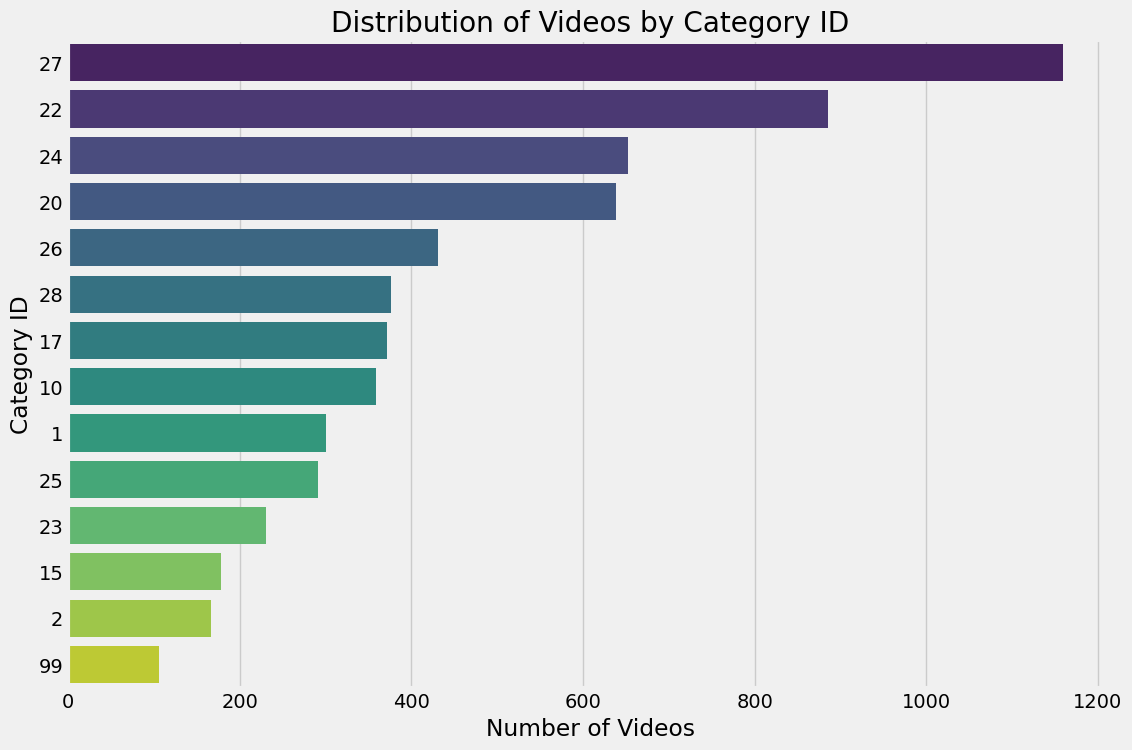

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))

sns.countplot(y=df['category_id'], order=df['category_id'].value_counts().index, palette='viridis')


plt.title('Distribution of Videos by Category ID')
plt.xlabel('Number of Videos')
plt.ylabel('Category ID')
plt.show()

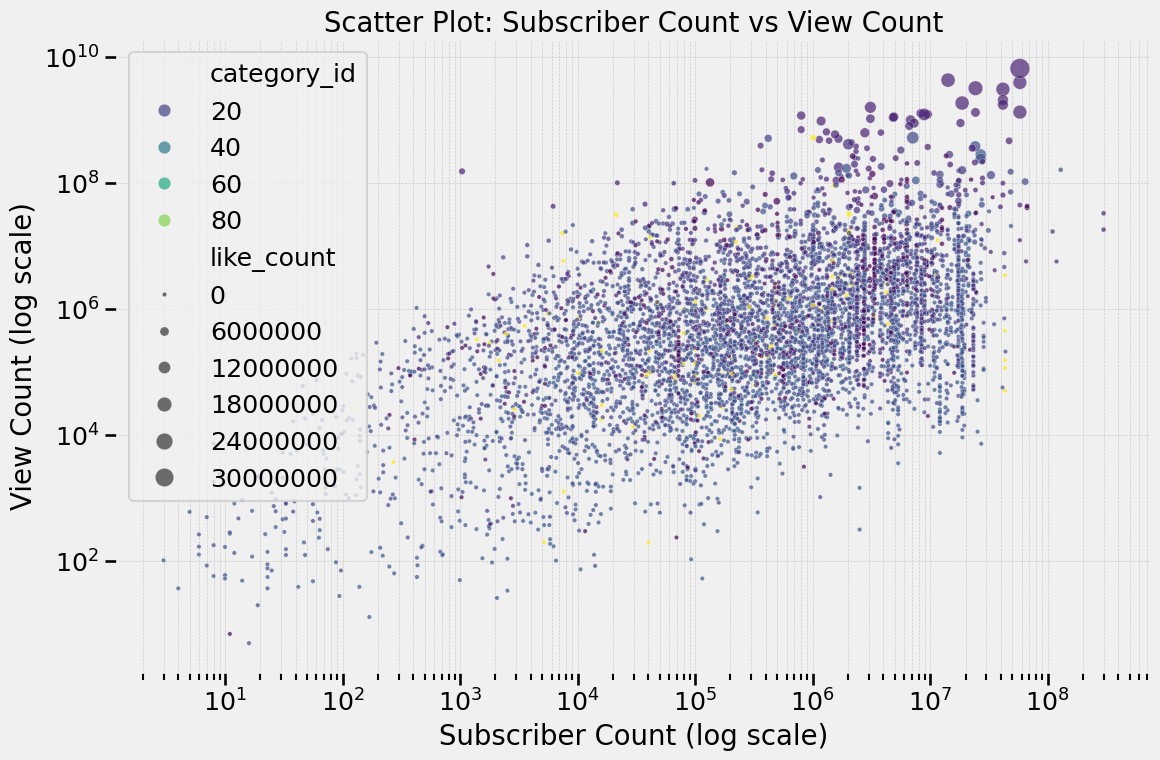

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
sns.set_context('talk', font_scale=1.1)

# Create the plot
plt.figure(figsize=(12, 8))

# Use log scale for better spread visibility
sns.scatterplot(
    data=df,
    x='subscriber_count',
    y='view_count',
    hue='category_id',
    size='like_count',
    alpha=0.7,
    sizes=(10, 200),
    palette='viridis',
    legend='brief'
)

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot: Subscriber Count vs View Count')
plt.xlabel('Subscriber Count (log scale)')
plt.ylabel('View Count (log scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()

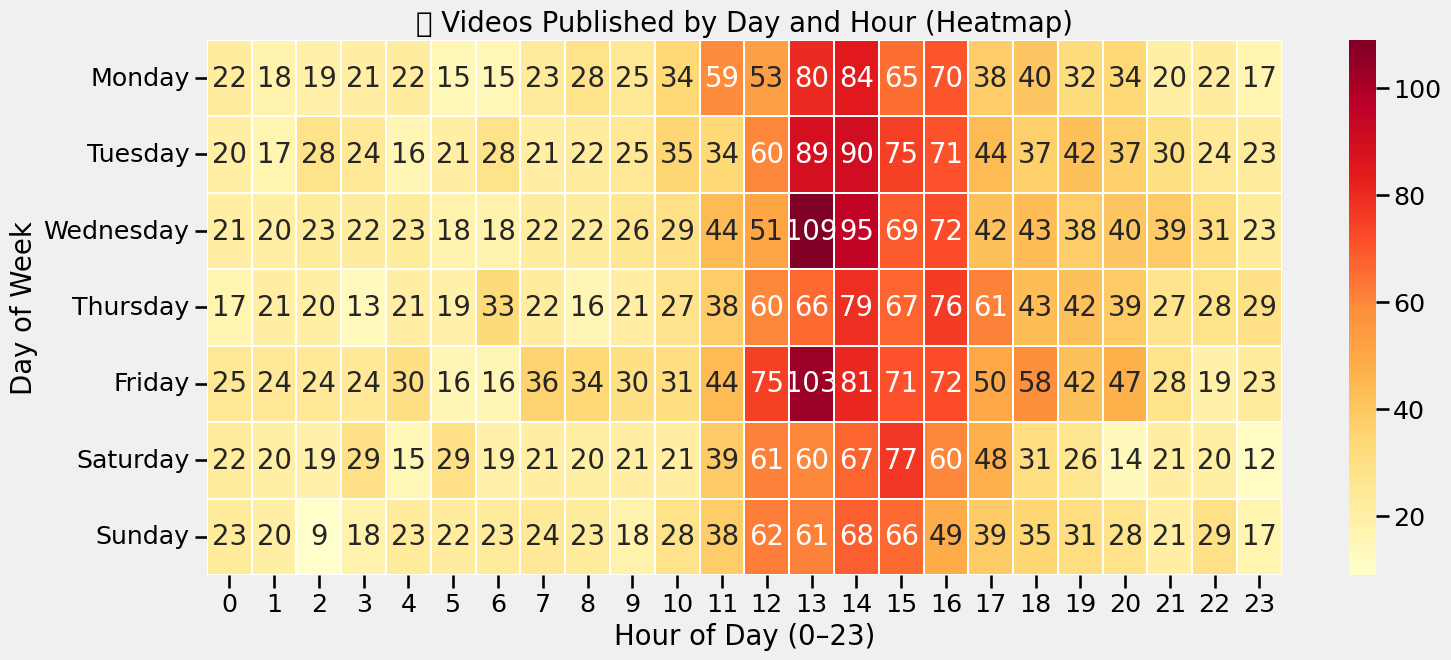

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your datetime is parsed
df['published_at'] = pd.to_datetime(df['published_at'])

# Extract day and hour
df['publish_hour'] = df['published_at'].dt.hour
df['publish_day_name'] = df['published_at'].dt.day_name()

# Create pivot table: rows = days, columns = hours
heatmap_data = df.pivot_table(
    index='publish_day_name',
    columns='publish_hour',
    values='video_id',  # use any non-null column just to count rows
    aggfunc='count',
    fill_value=0
)

# Sort days properly
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.loc[ordered_days]

# Plot heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, annot=True, fmt=".0f")
plt.title('🔥 Videos Published by Day and Hour (Heatmap)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,video_id,title,published_at,channel_id,category_id,view_count,like_count,comment_count,duration,description,...,channel_title,channel_description,channel_start_date,subscriber_count,channel_view_count,channel_video_count,profile_picture_url,banner_image_url,publish_hour,publish_day_name
0,390Pc6_fdeg,It’s literally perfect 🫠 #coding #java #progra...,2024-12-19 00:40:54+00:00,UC8Wt7vynFfRnoVtpNpESWjw,22,5839276,150804,2309,PT13S,NaN,...,Desk Mate,👇ON SALE NOW👇\n🖱️ The Official shop for ALL mo...,2024-07-20T23:40:34.027592Z,46100,47615980,404,https://yt3.ggpht.com/aZKtiCYGEaY4bFF1kCmME2n7...,NaN,0,Thursday
1,Sg4GMVMdOPo,Start coding with PYTHON in 5 minutes! 🐍,2024-08-16 16:08:32+00:00,UC4SVo0Ue36XCfOyb5Lh1viQ,27,349876,10378,452,PT5M50S,#python #pythontutorial #pythoncourse \n\nThis...,...,Bro Code,🗿\n,2019-10-10T14:40:46.568078Z,2770000,157318649,959,https://yt3.ggpht.com/ytc/AIdro_mPFVsxROj1dOtT...,https://yt3.googleusercontent.com/e3oXxGNaNy5b...,16,Friday
2,yZl5FJ3ChkI,Python Roadmap For Beginners (Step By Step),2025-07-21 13:02:04+00:00,UCgKFOz_KrMbmypWrawtzDQg,28,18443,1760,12,PT53S,"If I was a beginner learning to code, I would ...",...,SWErikCodes,Welcome to the channel!\n\nThis is where I doc...,2023-07-19T04:42:59.663153Z,34400,5454646,609,https://yt3.ggpht.com/kkef18oQHXtqscKAq3wFAO01...,https://yt3.googleusercontent.com/YUIeUbROXuPY...,13,Monday
3,ICMXzWk66Qg,Making Your Own Compiler! #programming #code #...,2023-07-12 12:00:22+00:00,UCWyEDE8MxOyGmdsluOpRqwQ,27,35829,1921,21,PT42S,#shorts \n\nFull Video: https://youtu.be/GsCWi...,...,bvdl․io,I make videos on all sorts of programming and ...,2023-02-26T14:58:26.165738Z,10100,962656,97,https://yt3.ggpht.com/V2-6rBVTTFSt1wwEgA962MDv...,https://yt3.googleusercontent.com/ov-grGjUE2Jw...,12,Wednesday
4,BplMR0txSeA,"Python on phone, pydroid 3 #python #android #c...",2025-02-19 11:43:05+00:00,UC8adQ8nskI9jQKTYC0q3O-w,27,90850,0,12,PT26S,Pydroid3: https://play.google.com/store/apps/d...,...,Electro Sage,NaN,2024-10-21T03:44:37.01017Z,377,137039,29,https://yt3.ggpht.com/EQn39H0Qn_LM3MtTtbfFp2b4...,https://yt3.googleusercontent.com/LsAtFiDeYjvg...,11,Wednesday


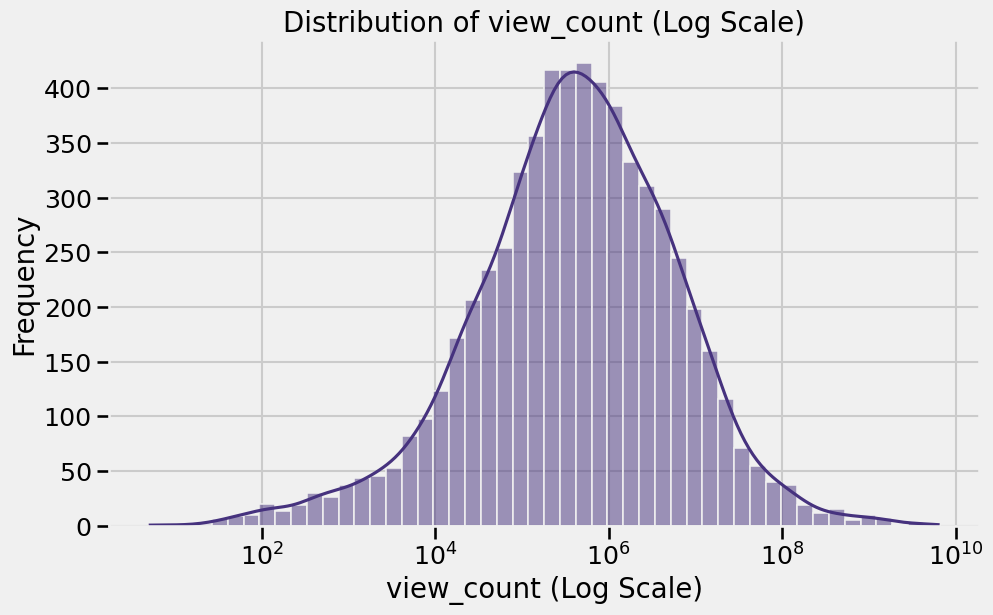

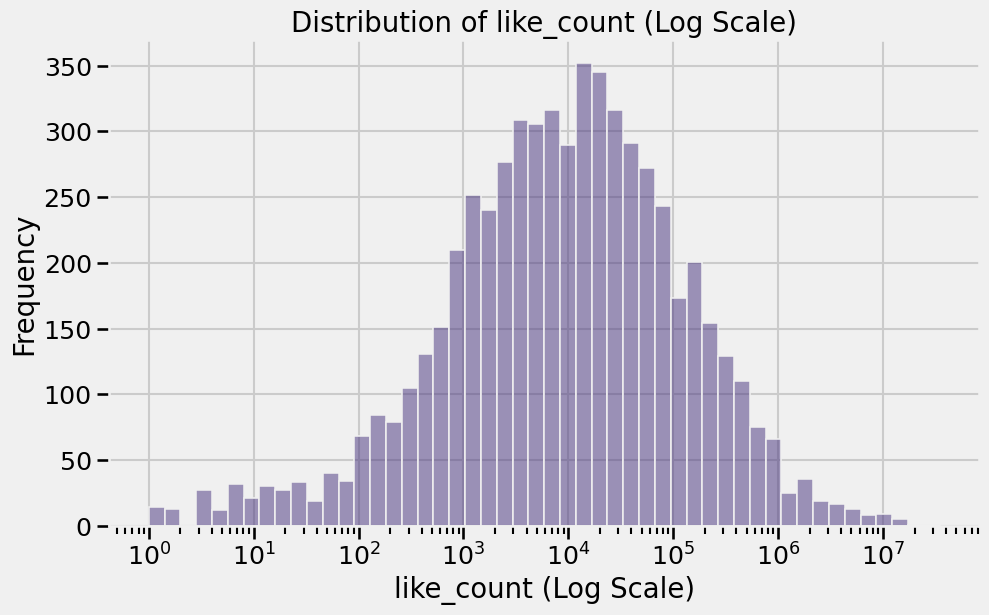

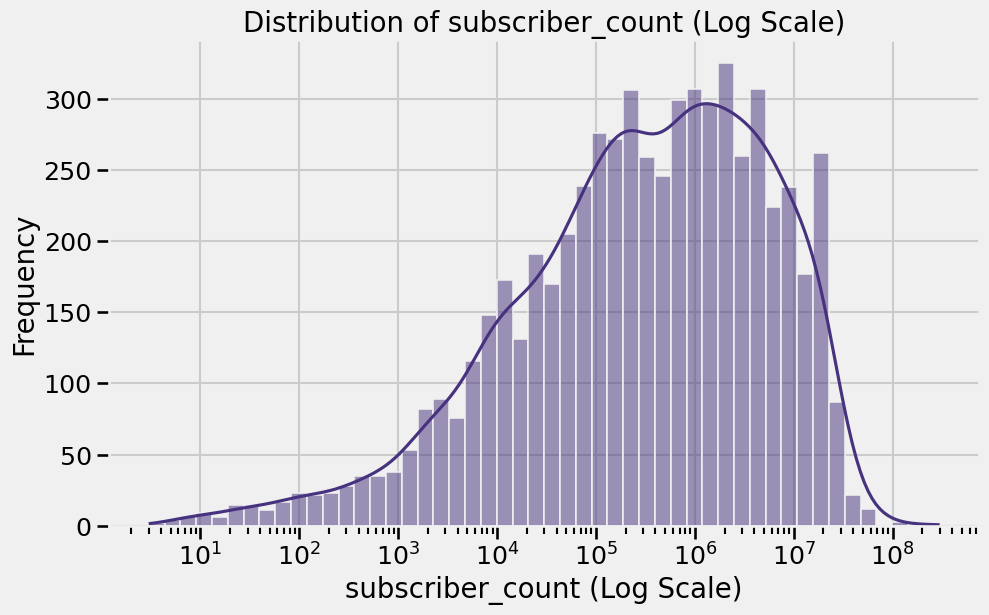

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to plot
numerical_features = ['view_count', 'like_count', 'subscriber_count']

# Create a histogram for each feature
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], log_scale=True, kde=True, bins=50)
    plt.title(f'Distribution of {col} (Log Scale)')
    plt.xlabel(f'{col} (Log Scale)')
    plt.ylabel('Frequency')
    plt.show()

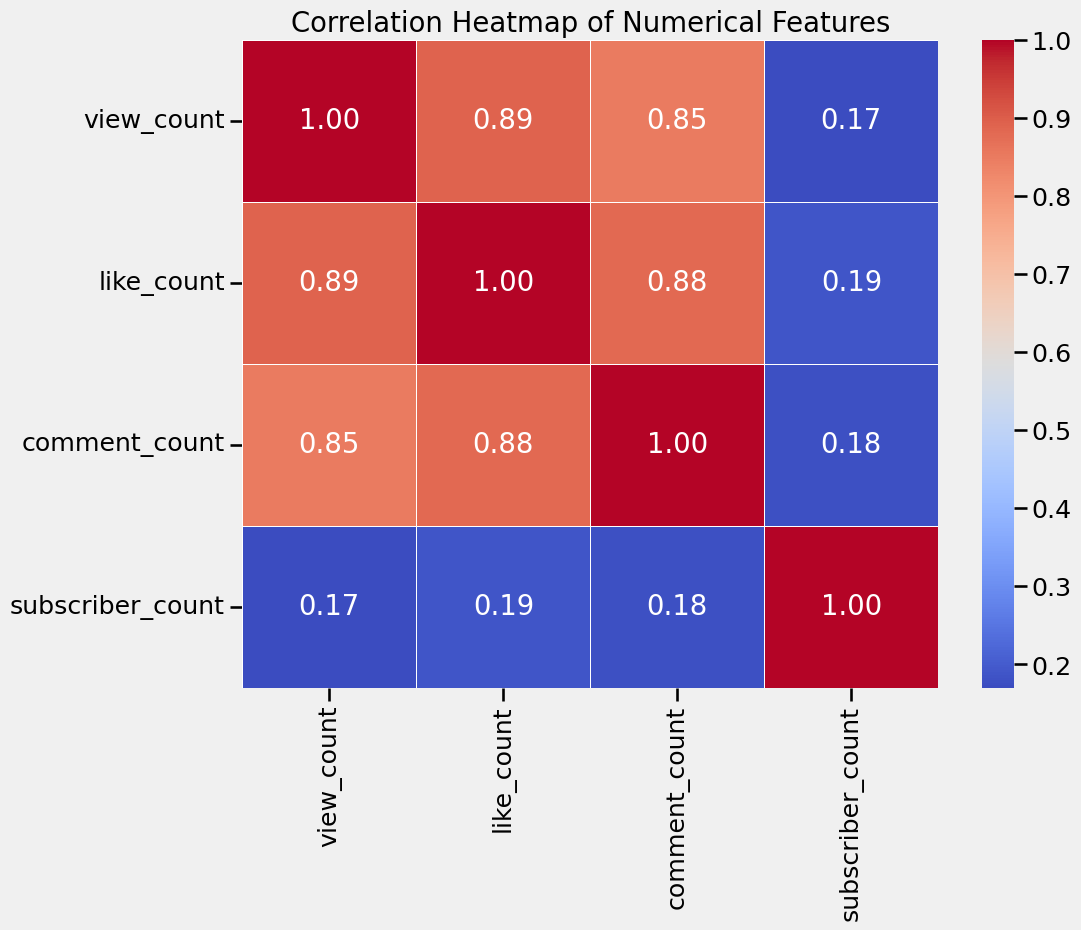

In [ ]:
# Select columns for the correlation matrix
corr_cols = ['view_count', 'like_count', 'comment_count', 'subscriber_count']

# Calculate the correlation matrix
correlation_matrix = df[corr_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Show the correlation values
    cmap='coolwarm',   # Use a clear color map
    fmt='.2f',         # Format values to two decimal places
    linewidths=.5
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

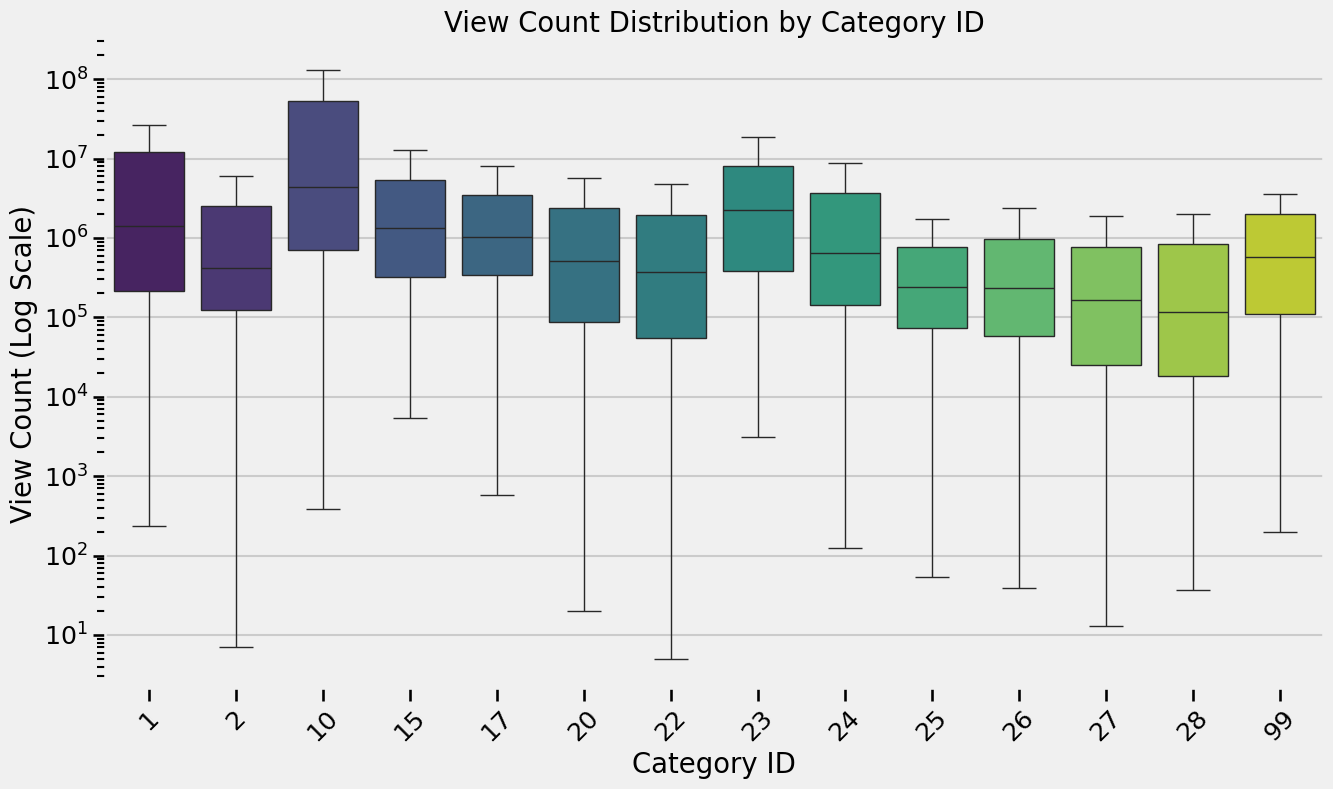

In [ ]:
plt.figure(figsize=(14, 8))

# Create the boxplot
sns.boxplot(x='category_id', y='view_count', data=df, palette='viridis', showfliers=False)

# Use a log scale on the y-axis for better visibility
plt.yscale('log')

plt.title('View Count Distribution by Category ID')
plt.xlabel('Category ID')
plt.ylabel('View Count (Log Scale)')
plt.xticks(rotation=45)
plt.show()

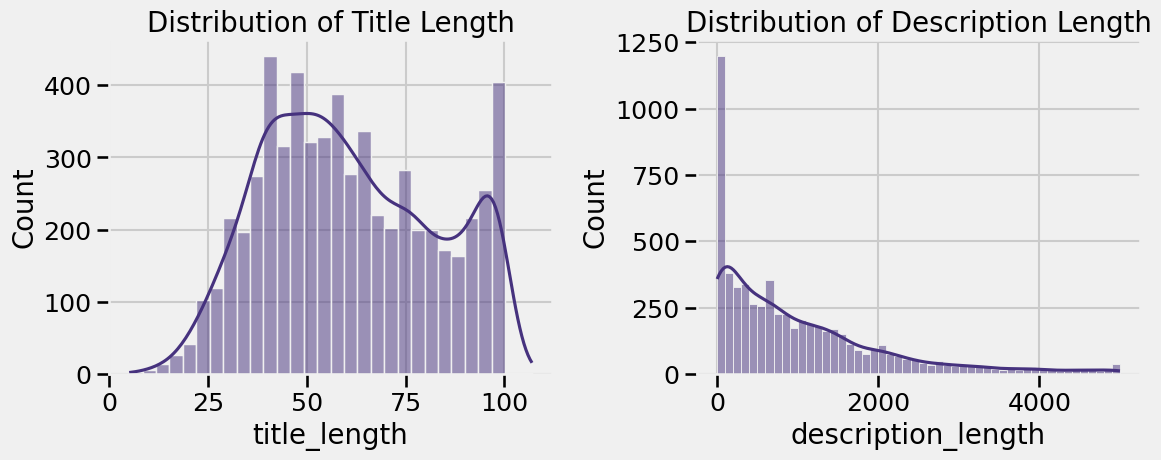

In [ ]:
# Create new features for text length
df['title_length'] = df['title'].str.len().fillna(0)
df['description_length'] = df['description'].str.len().fillna(0)

# Plot the distributions of the new features
plt.figure(figsize=(12, 5))

# Plot for title length
plt.subplot(1, 2, 1)
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Title Length')

# Plot for description length
plt.subplot(1, 2, 2)
sns.histplot(df['description_length'], bins=50, kde=True)
plt.title('Distribution of Description Length')

plt.tight_layout()
plt.show()